# German Traffic Sign Classification (GTSRB) 
---
In this notebook, we will classify (the have already been detected) traffic signs. In the data the images contain traffic signs and their classes for training. We will use CNNs to train a model to recognize the traffic road signs. They play an important role in automonously driven road vehicles and can help the vehicle take certain decisions

In [1]:
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import tensorflow as tf
from tensorflow import keras

### Exploratory Analysis
---
On Exploring the data we found that there are 43 classes, 39209 training images and 12630 testing images \
Most images are just augmented images of an orignal image with some noise and variation in brightness

In [2]:
data_dir = "data"

In [3]:
os.listdir(data_dir)

['Meta',
 'Meta.csv',
 'model.h5',
 'Sign_names.csv',
 'Test',
 'Test.csv',
 'Train',
 'Train.csv',
 'Validation']

In [4]:
df = pd.read_csv(data_dir+'/Sign_names.csv')
df

ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                               Stop
15       15                                        No vehicles
16       16           Vehicles over 3.5 metric tons prohibited
17       17                                           No entry
18       18                                    General caution
19       19                        Dangerous curve to the left
20       20                       Dangerous curve to the right
21       21                                       Double curve
22       22                                         Bumpy road
23       23                                      Slippery road
24       24                          Road narrows on the right
25       25                                          Road work
26       26                                    Traffic signals
27       27                                        Pedestrians
28       28                                  Children crossing
29       29                                  Bicycles crossing
30       30                                 Beware of ice/snow
31       31                              Wild animals crossing
32       32                End of all speed and passing limits
33       33                                   Turn right ahead
34       34                                    Turn left ahead
35       35                                         Ahead only
36       36                               Go straight or right
37       37                                Go straight or left
38       38                                         Keep right
39       39                                          Keep left
40       40                               Roundabout mandatory
41       41                                  End of no passing
42       42  End of no passing by vehicles over 3.5 metric ...

 The Sign_names.csv data talks about the various classes (43) of traffic signs present in the dataset

In [5]:
df1 = pd.read_csv(data_dir+'/Meta.csv')
df1

Path  ClassId  ShapeId  ColorId SignId
0   Meta/27.png       27        0        0   1.32
1    Meta/0.png        0        1        0   3.29
2    Meta/1.png        1        1        0   3.29
3   Meta/10.png       10        1        0   3.27
4   Meta/11.png       11        0        0   1.22
5   Meta/12.png       12        2        2    2.3
6   Meta/13.png       13        4        0    2.1
7   Meta/14.png       14        3        0    2.2
8   Meta/15.png       15        1        0    3.1
9   Meta/16.png       16        1        0    3.3
10  Meta/17.png       17        1        0   3.21
11  Meta/18.png       18        0        0   1.39
12  Meta/19.png       19        0        0    1.2
13   Meta/2.png        2        1        0   3.29
14  Meta/20.png       20        0        0    1.1
15  Meta/21.png       21        0        0  1.3.2
16  Meta/22.png       22        0        0    1.1
17  Meta/23.png       23        0        0   1.13
18  Meta/24.png       24        0        0  1.5.2
19  Meta/25.png       25        0        0   1.37
20  Meta/26.png       26        0        0   1.24
21  Meta/28.png       28        0        0   1.33
22  Meta/29.png       29        0        0   1.34
23   Meta/3.png        3        1        0   3.29
24  Meta/30.png       30        0        0   None
25  Meta/31.png       31        0        0   1.36
26  Meta/32.png       32        1        3   3.42
27  Meta/33.png       33        1        1    4.2
28  Meta/34.png       34        1        1    4.3
29  Meta/35.png       35        1        1    4.1
30  Meta/36.png       36        1        1    4.4
31  Meta/37.png       37        1        1    4.5
32  Meta/38.png       38        1        1    4.7
33  Meta/39.png       39        1        1    4.8
34   Meta/4.png        4        1        0   3.29
35  Meta/40.png       40        1        1    4.1
36  Meta/41.png       41        1        3   3.26
37  Meta/42.png       42        1        3   3.28
38   Meta/5.png        5        1        0   3.29
39   Meta/6.png        6        1        3    3.3
40   Meta/7.png        7        1        0   3.29
41   Meta/8.png        8        1        0   3.29
42   Meta/9.png        9        1        0   3.25

Folder for image classes

In [6]:
train = pd.read_csv(data_dir+'/Train.csv')
train

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0         27      26       5       5      22      20       20   
1         28      27       5       6      23      22       20   
2         29      26       6       5      24      21       20   
3         28      27       5       6      23      22       20   
4         28      26       5       5      23      21       20   
...      ...     ...     ...     ...     ...     ...      ...   
39204     52      56       5       6      47      51       42   
39205     56      58       5       5      51      53       42   
39206     58      62       5       6      53      57       42   
39207     63      69       5       7      58      63       42   
39208     68      69       7       6      62      63       42   

                                 Path  
0      Train/20/00020_00000_00000.png  
1      Train/20/00020_00000_00001.png  
2      Train/20/00020_00000_00002.png  
3      Train/20/00020_00000_00003.png  
4      Train/20/00020_00000_00004.png  
...                               ...  
39204  Train/42/00042_00007_00025.png  
39205  Train/42/00042_00007_00026.png  
39206  Train/42/00042_00007_00027.png  
39207  Train/42/00042_00007_00028.png  
39208  Train/42/00042_00007_00029.png  

[39209 rows x 8 columns]

Train has the path of the training data images, It also tells the width, height of the image, the co-ordinages of the identified sign and its classId

In [7]:
test = pd.read_csv(data_dir+'/Test.csv')
test

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0         53      54       6       5      48      49       16  Test/00000.png
1         42      45       5       5      36      40        1  Test/00001.png
2         48      52       6       6      43      47       38  Test/00002.png
3         27      29       5       5      22      24       33  Test/00003.png
4         60      57       5       5      55      52       11  Test/00004.png
...      ...     ...     ...     ...     ...     ...      ...             ...
12625     42      41       5       6      37      36       12  Test/12625.png
12626     50      51       6       5      45      46       33  Test/12626.png
12627     29      29       6       6      24      24        6  Test/12627.png
12628     48      49       5       6      43      44        7  Test/12628.png
12629     32      31       6       5      27      26       10  Test/12629.png

[12630 rows x 8 columns]

Similar results as train data

Lets see the distribution of classes in test and train data

<AxesSubplot: xlabel='ClassId'>

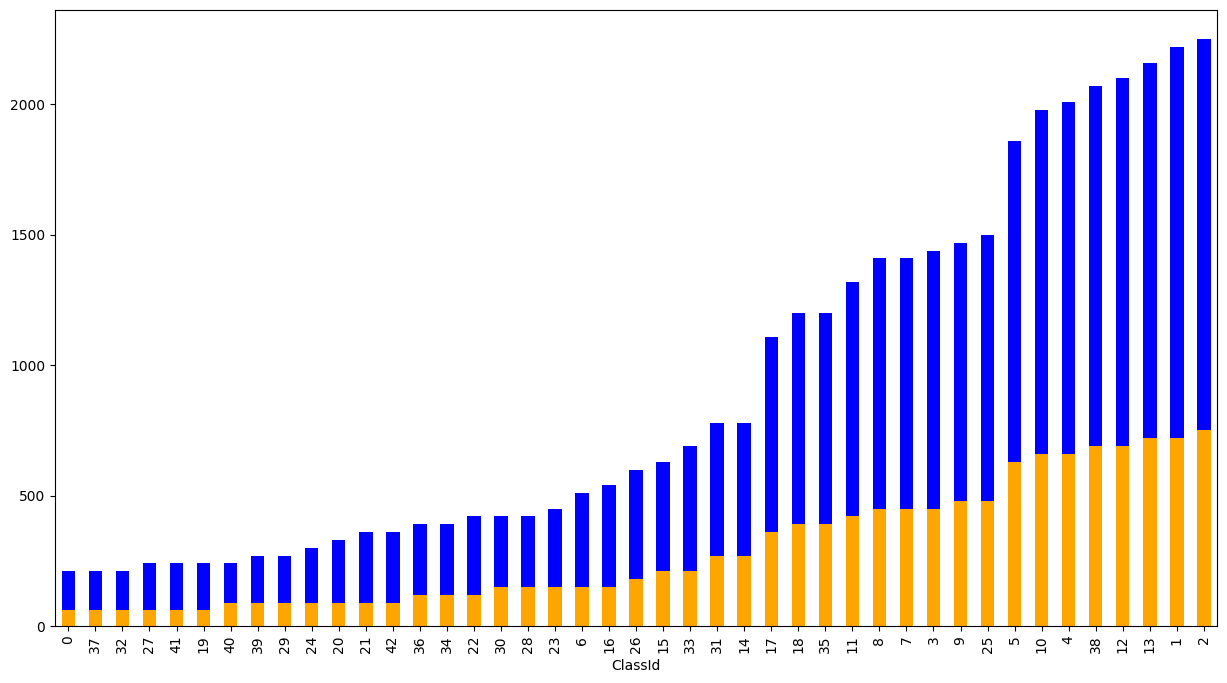

In [8]:
temp_test = test.groupby(['ClassId'])['ClassId'].count().sort_values(ascending=True)
temp_train = train.groupby(['ClassId'])['ClassId'].count().sort_values(ascending=True)

temp_train.plot.bar(color='blue', figsize=(15, 8))
temp_test.plot.bar(color='orange', figsize=(15, 8))

We can see both have a similar distribution of data

Lets take a look at some of the training images from each class

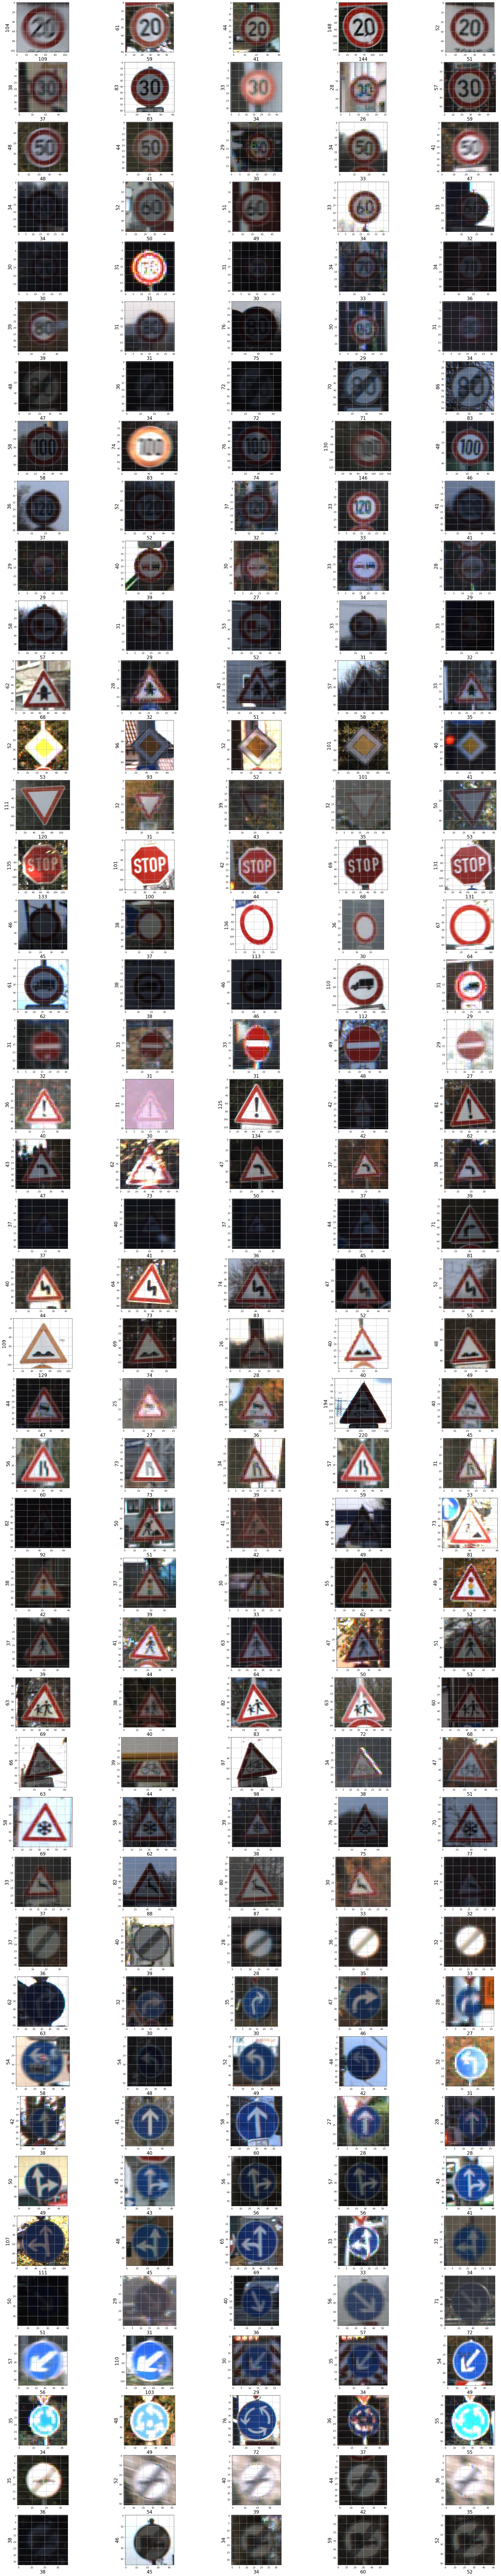

In [9]:
from matplotlib.image import imread

plt.figure(figsize=(40,200))

for j in range(43):
    for i in range(5):
        plt.subplot(43,5,j*5 + i+1)
        file_path = 'data/Train/' + str(j)
        rand_img_path = file_path + '/' + random.choice(os.listdir(file_path))
        rand_img = imread(rand_img_path)
        plt.imshow(rand_img)
        plt.grid(visible=None)
        plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
        plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image
    

We can see that in each class there are multiple clones of a single image with added noise, rotation and varying brightness.
To improve our model, we will add some shearing and shifting to the images.

### Data Preparation
---
To pass test data in ImageDataGenerator we need to put them in their apporpriate classes, (similar format as train data)

In [10]:
# Make class directories

for i in range(43):
    try:
        os.mkdir(data_dir+'/Test/'+str(i))
    except:
        pass

In [11]:
# Iterate test df and mov image to apporpriate directory

for index, row in test.iterrows():
    
    file_path = data_dir+ '/'+ row['Path']
    new_file_path = file_path.replace('Test/', 'Test/'+ str(row['ClassId']) + '/')

    try:
        os.rename(file_path, new_file_path)
    except:
        pass

We also need to make some validation data

In [12]:
validation = temp_train/10
validation_dir = data_dir + "/Validation"
try:
    os.mkdir(validation_dir)
except:
    pass
print(os.path.isdir(validation_dir))
validation

True


ClassId
0      21.0
37     21.0
19     21.0
32     24.0
27     24.0
41     24.0
42     24.0
24     27.0
29     27.0
39     30.0
21     33.0
40     36.0
20     36.0
36     39.0
22     39.0
6      42.0
16     42.0
34     42.0
30     45.0
23     51.0
28     54.0
26     60.0
15     63.0
33     68.9
14     78.0
31     78.0
17    111.0
18    120.0
35    120.0
11    132.0
3     141.0
8     141.0
7     144.0
9     147.0
25    150.0
5     186.0
4     198.0
10    201.0
38    207.0
12    210.0
13    216.0
1     222.0
2     225.0
Name: ClassId, dtype: float64

In [13]:
for index, row in validation.items():
    try:
        train_path = data_dir + "/Train/" + str(index)
        validation_path = validation_dir + "/" + str(index)
        os.mkdir(validation_path)
        for i in range(int(row)):
            rand_img_path = random.choice(os.listdir(train_path))
            old_path = train_path + '/' + rand_img_path
            new_path = validation_path + "/" + rand_img_path
            os.rename(old_path, new_path)
    except:
        pass

### Data Augmentation 
---

In [14]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1, # horizontal shift
        height_shift_range = 0.1, # vertical shift
        shear_range = 0.1 # shearing range
)

In [16]:
train_generator = datagen.flow_from_directory(
                      directory='data/Train/',
                      target_size=(32, 32), # resize to this size
                      color_mode="rgb", # for coloured images
                      batch_size=32,
                      class_mode='categorical', # classes to predict
                      seed=42 # to make the result reproducible
                  )

Found 35289 images belonging to 43 classes.


In [17]:
validation_generator = datagen.flow_from_directory(
                      directory= validation_dir,
                      target_size=(32, 32), # resize to this size
                      batch_size=32,
                      color_mode="rgb", # for coloured images
                      seed=42 # to make the result reproducible
                  )

Found 3920 images belonging to 43 classes.


In [18]:
test_generator = datagen.flow_from_directory(
                      directory= 'data/Test/',
                      target_size=(32, 32), # resize to this size
                      batch_size=32,
                      color_mode="rgb", # for coloured images
                      shuffle=False,
                      seed=42 # to make the result reproducible
                  )

Found 12630 images belonging to 43 classes.


### Model Creation 
---

In [19]:
from tensorflow.keras import Sequential, optimizers, layers

In [20]:

model = Sequential([
        
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
        
    layers.Flatten(),
    
    layers.Dense(256, activation='relu'),
    layers.Dense(43, activation='softmax')
])

#Optimizer
optimizer = optimizers.Adam(lr=3e-3, amsgrad=True)

#Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          7

### Model Training
---

First lets create a callback that will help save our model at every epoch \
This is helpful so that we can choose the best model later after training on a large number of epochs

In [21]:
try:
    os.mkdir("Models")
except:
    pass

class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
            self.model.save("Models/model_{}.h5".format(epoch))

Lets check if GPU is available

In [22]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [23]:
saver = CustomSaver()

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[saver]
)

Epoch 1/10
1103/1103 [==============================] - 32s 29ms/step - loss: 0.9816 - accuracy: 0.7144 - val_loss: 0.3657 - val_accuracy: 0.8855
Epoch 2/10
1103/1103 [==============================] - 27s 25ms/step - loss: 0.2073 - accuracy: 0.9327 - val_loss: 0.3297 - val_accuracy: 0.8964
Epoch 3/10
1103/1103 [==============================] - 27s 25ms/step - loss: 0.1203 - accuracy: 0.9617 - val_loss: 0.1116 - val_accuracy: 0.9663
Epoch 4/10
1103/1103 [==============================] - 27s 25ms/step - loss: 0.0855 - accuracy: 0.9726 - val_loss: 0.0702 - val_accuracy: 0.9755
Epoch 5/10
1103/1103 [==============================] - 30s 27ms/step - loss: 0.0650 - accuracy: 0.9794 - val_loss: 0.0733 - val_accuracy: 0.9814
Epoch 6/10
1103/1103 [==============================] - 29s 27ms/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.0749 - val_accuracy: 0.9791
Epoch 7/10
1103/1103 [==============================] - 27s 25ms/step - loss: 0.0417 - accuracy: 0.9874 - val_loss: 0.0537 -

### Model Testing and Evaluation 
---

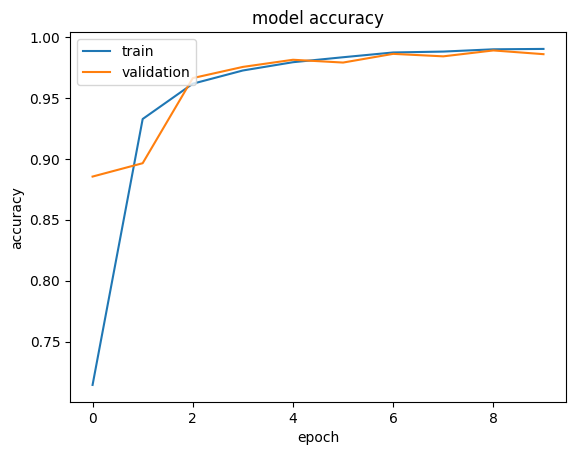

In [24]:
#plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

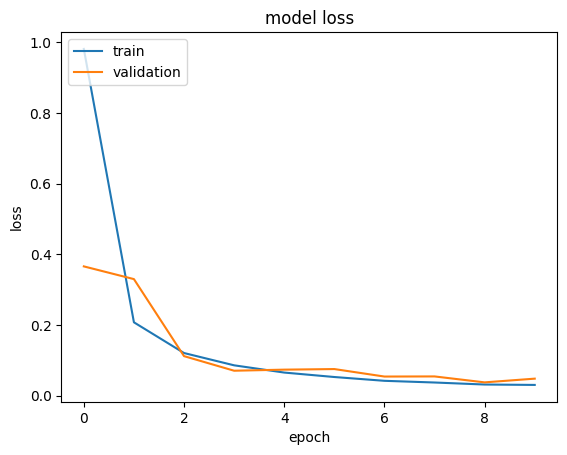

In [25]:
#plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

395/395 [==============================] - 10s 26ms/step - loss: 0.2769 - accuracy: 0.9345


In [37]:
model.load_weights("Models/model_8.h5")


In [39]:
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

395/395 [==============================] - 9s 22ms/step - loss: 0.2576 - accuracy: 0.9371


In [40]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(test_generator)
print(classification_report(test_generator.labels, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.98      0.97      0.97       720
           2       0.98      0.99      0.99       660
           3       0.94      0.89      0.91       420
           4       0.93      0.93      0.93       690
           5       0.98      0.99      0.98       720
           6       1.00      0.99      1.00       270
           7       0.99      0.94      0.97       210
           8       0.95      0.99      0.97       150
           9       1.00      0.89      0.94       360
          10       0.96      0.84      0.90       390
          11       0.78      0.95      0.86        60
          12       0.92      0.98      0.95       750
          13       0.82      0.97      0.89        90
          14       0.94      0.66      0.77        90
          15       0.94      0.91      0.92       120
          16       0.93      0.87      0.90       150
          17       0.91    

In [41]:
model.save(data_dir+"/model.h5")